# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

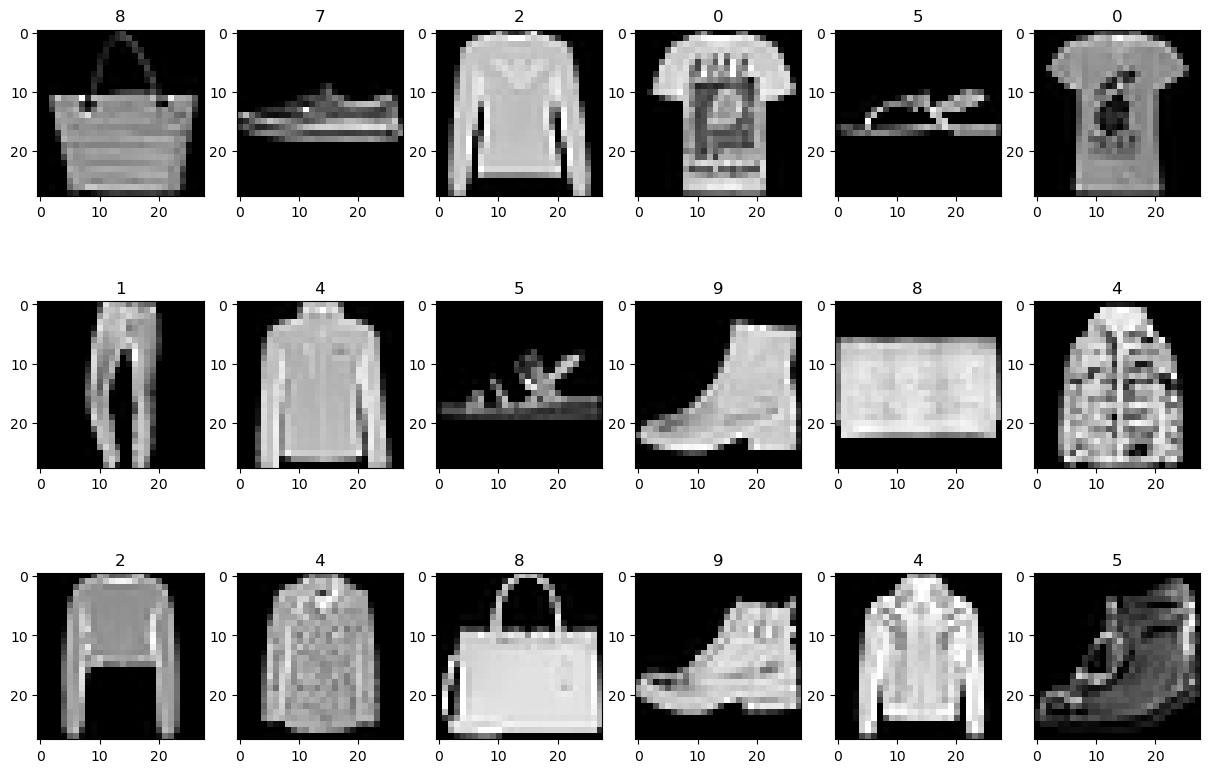

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [4]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [5]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
  1/938 [..............................] - ETA: 2:24 - loss: 2.2918 - accuracy: 0.0781

2024-07-20 20:37:29.982953: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


938/938 [==============================] - 7s 7ms/step - loss: 0.3876 - accuracy: 0.8646 - val_loss: 0.3278 - val_accuracy: 0.8837
Epoch 2/50
938/938 [==============================] - 7s 7ms/step - loss: 0.2599 - accuracy: 0.9076 - val_loss: 0.2895 - val_accuracy: 0.8968
Epoch 3/50
938/938 [==============================] - 7s 8ms/step - loss: 0.2192 - accuracy: 0.9203 - val_loss: 0.2926 - val_accuracy: 0.8980
Epoch 4/50
938/938 [==============================] - 7s 8ms/step - loss: 0.1891 - accuracy: 0.9306 - val_loss: 0.2910 - val_accuracy: 0.9035
Epoch 5/50
938/938 [==============================] - 8s 8ms/step - loss: 0.1663 - accuracy: 0.9390 - val_loss: 0.3121 - val_accuracy: 0.8990
Epoch 6/50
938/938 [==============================] - 8s 8ms/step - loss: 0.1500 - accuracy: 0.9456 - val_loss: 0.3085 - val_accuracy: 0.9027
Epoch 7/50
938/938 [==============================] - 8s 8ms/step - loss: 0.1346 - accuracy: 0.9507 - val_loss: 0.3358 - val_accuracy: 0.8981
Epoch 8/50
938/93

Train Acc      0.9933000206947327
Validation Acc 0.887499988079071


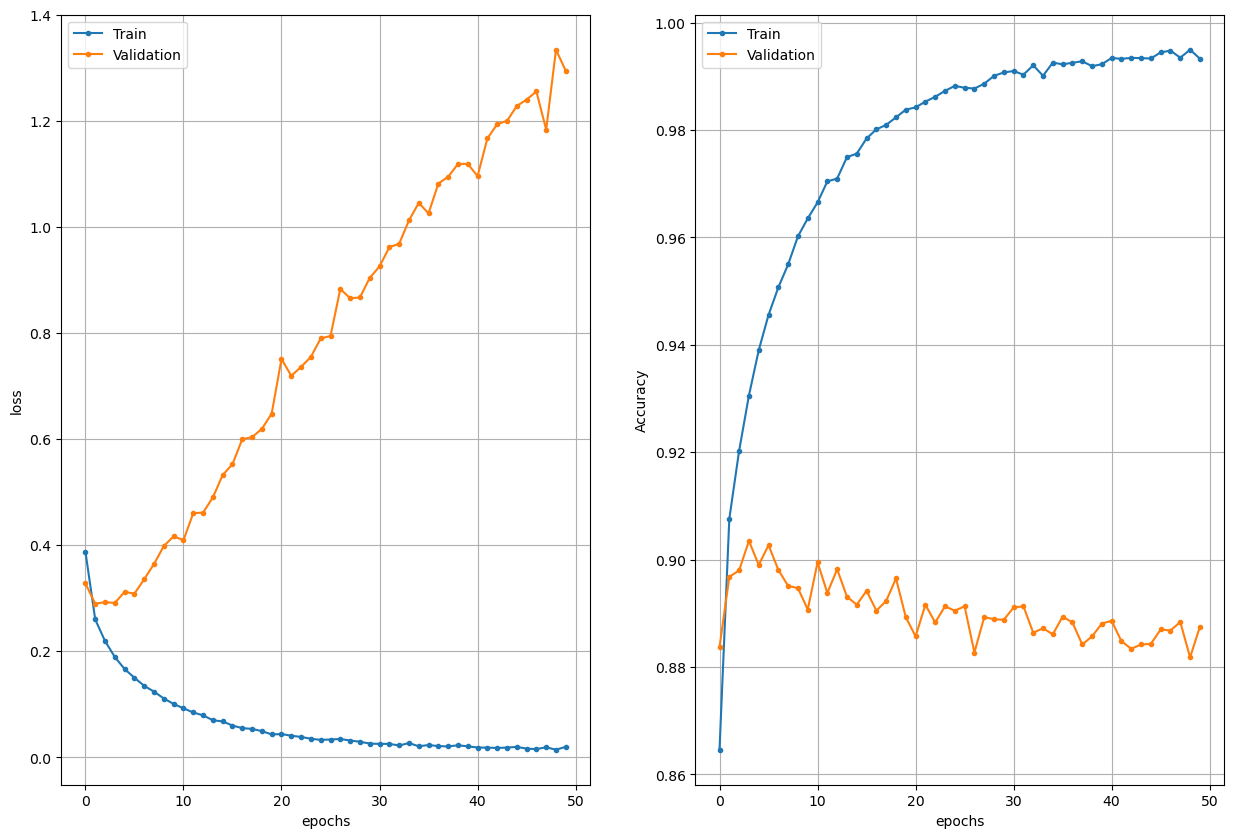

In [7]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [32]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = Dropout(0.3)(net)

net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = Dropout(0.4)(net)

net = Flatten()(net)
net = Dense(128)(net)
net = BatchNormalization()(net)
net = Dropout(0.5)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_17 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                          

In [33]:
# Train the network
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 52s 55ms/step - loss: 0.4471 - accuracy: 0.8462 - val_loss: 0.3397 - val_accuracy: 0.8798
Epoch 2/50
938/938 [==============================] - 51s 54ms/step - loss: 0.3014 - accuracy: 0.8929 - val_loss: 0.2762 - val_accuracy: 0.8999
Epoch 3/50
938/938 [==============================] - 52s 56ms/step - loss: 0.2636 - accuracy: 0.9051 - val_loss: 0.2680 - val_accuracy: 0.9031
Epoch 4/50
938/938 [==============================] - 52s 56ms/step - loss: 0.2376 - accuracy: 0.9146 - val_loss: 0.2499 - val_accuracy: 0.9094
Epoch 5/50
938/938 [==============================] - 53s 56ms/step - loss: 0.2186 - accuracy: 0.9222 - val_loss: 0.2425 - val_accuracy: 0.9118
Epoch 6/50
938/938 [==============================] - 53s 57ms/step - loss: 0.2036 - accuracy: 0.9269 - val_loss: 0.2617 - val_accuracy: 0.9083
Epoch 7/50
938/938 [==============================] - 53s 56ms/step - loss: 0.1878 - accuracy: 0.9324 - val_loss: 0.2642 - val_accuracy:

Train Acc      0.9772666692733765
Validation Acc 0.92330002784729


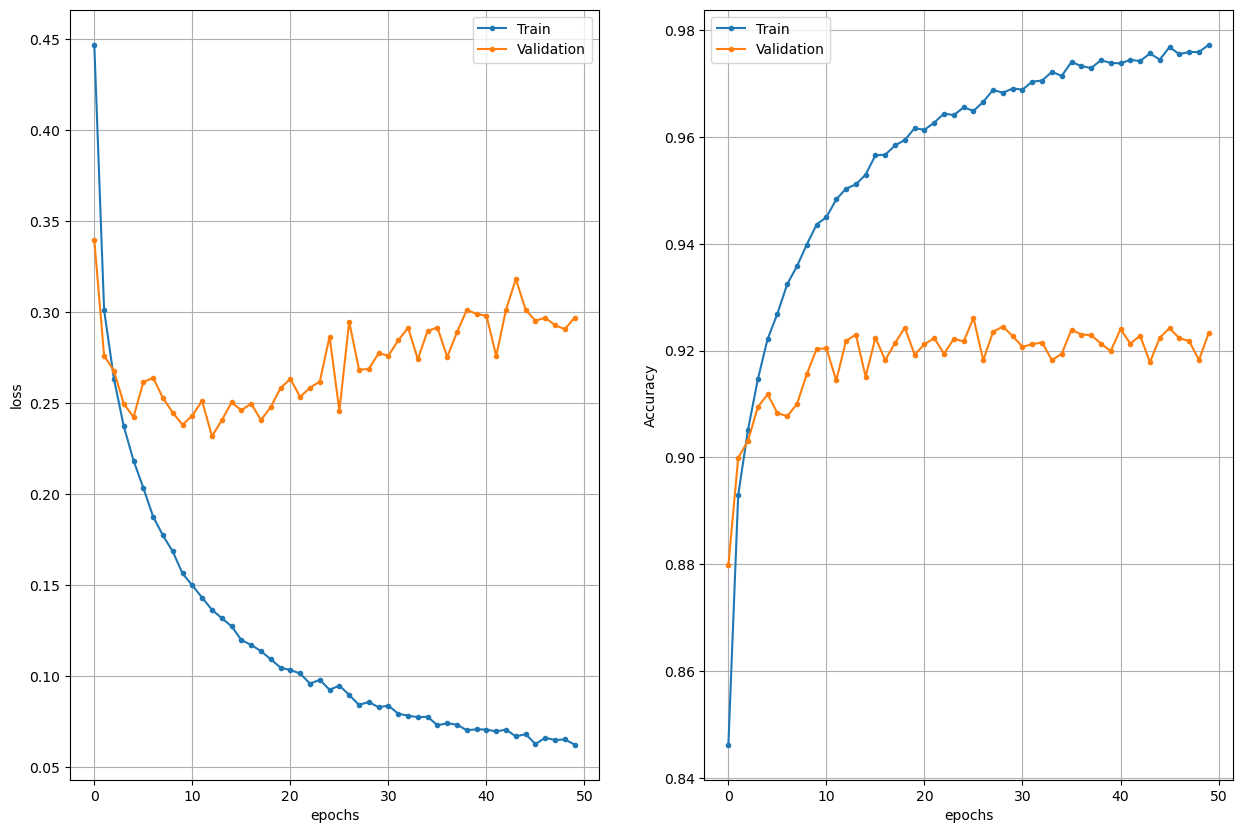

In [34]:
# Show the results
plot_history(history)


### Questions

* What have you done in order to improve the performance?  
  Dropout + BatchNormalization + One more Conv layer = 0.92330002784729  
* Have you tried configurations that did not work out?  
  BatchNormalization gives worse result than the original one 0.8802000284194946  
  Adding Dropouts gives 0.8991000056266785  
  BatchNormalization + Dropout 0.9002000093460083  